## Introduction

Every year in the draft, we see a similar trend of the values picks regressing as you go deeper and deeper into the draft. Once out of the lottery, the odds of a team striking gold start to diminish and a couple of factors may go into a team discovering a diamond in the rough:
 * Luck (Mostly responsible)
 * Teams doing their due diligence 
 
Though luck may be what is responsible for a lot of teams in picking the next Nikola Jokic or Kawahi Leonard, I wanted to explore the second round of the draft and see over the course of history how teams have fared in selecting players at this stage. 

* What are the chances of picking an All-Star in the second round? 
* What are the chances of picking a starter?
* A valuable role player?

Lets dive into the data (**credit: Basketball-Reference**) and see what we find

## Data Collection

I collected the [data](https://www.basketball-reference.com/play-index/draft_finder.cgi?request=1&year_min=1985&round_min=2&round_max=2&college_id=0&pos_is_g=Y&pos_is_gf=Y&pos_is_f=Y&pos_is_fg=Y&pos_is_fc=Y&pos_is_c=Y&pos_is_cf=Y&order_by=ws) on all second round picks since the lottery era (1985), there is no particular reason for this arbitrary cut-off but I just believed we would have enough of a sample size to get the general idea of the type of players we get during that period. 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\hashi\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
draft = pd.read_table('second_round.txt', sep=',', header = 1)

In [10]:
# See the name of the columns
list(draft)

['Rk',
 'Year',
 'Lg',
 'Rd',
 'Pk',
 'Tm',
 'Player',
 'Age',
 'Pos',
 'Born',
 'College',
 'From',
 'To',
 'G',
 'MP',
 'PTS',
 'TRB',
 'AST',
 'STL',
 'BLK',
 'FG%',
 '2P%',
 '3P%',
 'FT%',
 'WS',
 'WS/48']

In [46]:
list(range(13,26)

[13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 6]

In [47]:
# Showing the relevant stats from the first five players
draft.head(5).iloc[:,[6] + list(range(13,26))]

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
0,Jeff Hornacek\hornaje01,1077,31.5,14.5,3.4,4.9,1.4,0.2,0.496,0.515,0.403,0.877,108.9,0.154
1,Manu Ginobili\ginobma01,1057,25.4,13.3,3.5,3.8,1.3,0.3,0.447,0.498,0.369,0.827,106.4,0.190
2,Rashard Lewis\lewisra02,1049,32.0,14.9,5.2,1.7,1.1,0.5,0.452,0.491,0.386,0.805,90.9,0.130
3,Dennis Rodman\rodmade01,911,31.7,7.3,13.1,1.8,0.7,0.6,0.521,0.542,0.231,0.584,89.8,0.150
4,P.J. Brown\brownpj01,1089,31.1,9.1,7.7,1.5,0.8,1.0,0.460,0.463,0.136,0.794,89.8,0.128


In [48]:
draft.tail(5).iloc[:,[6] + list(range(13,26))]

,Player,G,MP,PTS,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
673,Tyshawn Taylor\tayloty01,61,8.0,2.9,0.5,0.9,0.4,0.0,0.354,0.353,0.360,0.684,-0.9,-0.088
674,Isaiah Whitehead\whiteis01,89,20.5,7.2,2.4,2.4,0.6,0.4,0.411,0.452,0.305,0.788,-0.9,-0.025
675,Kenny Satterfield\satteke01,75,14.2,4.3,1.3,2.3,0.7,0.0,0.335,0.355,0.218,0.746,-1.1,-0.051
676,Cory Carr\carrco01,42,14.9,4.1,1.2,1.6,0.5,0.2,0.329,0.355,0.167,0.750,-1.2,-0.089
677,Sean Green\greense01,84,8.0,4.2,1.0,0.5,0.4,0.2,0.386,0.412,0.246,0.620,-1.3,-0.095


In [94]:
# Average number of minutes played by second round selections and the standard deviaiton
draft.describe().loc[['mean', 'std'],'MP']

mean    13.617257
std      7.540446
Name: MP, dtype: float64

## Data

Per Basketball-Reference, there are 678 players since 1985 selected in the second round that played minutes in the NBA, with that mind lets proceed further

In [7]:
# How many players?
np.shape(draft)

(678, 26)

In [8]:
# Missing data. There are 234 data points missing from our rows
draft.isnull().sum().sum()

234

## Querying the data

Let us ask some basic questions from this data, 
* Out of these players how many went on to play at least 2 seasons worth of games? I am going to make the cut off at 100

* How many players ended up being valuable role players? (> 20 MP/G and 10 PTS/G)

In [90]:
# Seeing if there is correlation between 'Win Shares' and where a player is picked in the second roun
draft.corr().loc['Pk', 'WS']

-0.069866987184886042

In [51]:
# We see, nearly half of the second round selections nearly went onto be a part of 100 games
len(draft.query('G > 100'))

331

In [59]:
# A more telling result, 126/678 went on to become off the bench role players
len(draft[(draft['G'] >100) & (draft['MP'] > 20)])

126

In [65]:
# How many went on to become crucial scorers off the bench?
draft[(draft['G'] >100) & (draft['MP'] > 20) & (draft['PTS'] > 10)].iloc[:,[1,6]]

,Year,Player
0,1986,Jeff Hornacek\hornaje01
1,1999,Manu Ginobili\ginobma01
2,1998,Rashard Lewis\lewisra02
5,1989,Clifford Robinson\robincl02
6,2006,Paul Millsap\millspa01
7,2002,Carlos Boozer\boozeca01
9,2007,Marc Gasol\gasolma01
10,1986,Mark Price\pricema01
11,1985,Hot Rod Williams\williho01
14,2005,Marcin Gortat\gortama01


In [66]:
len(draft[(draft['G'] >100) & (draft['MP'] > 20) & (draft['PTS'] > 10)])

55

## Comments
So in the past 33 years, 55 players went on to become valuable bench players for their teams when selected in the second round. That is around 2 players (1.667 to be exact) every year in the second draft. Safe to say the odds of landing a contributing player are slim (1.667/30 = 5.5%) 

Let us see, how teams have done in the past 10 years with this. We see out of a possible 300 players (30 players selected in the second round x 10 = 300), there were only 13 that are starters or role players. (13/300 = 4.33%). 

Out of these 13 players, only 2 went on to become NBA All-Stars (Dragic and Thomas), that is 2/300 = 0.06% 

In [71]:
# 13 players in the past 10 years. Lower than what our data says overall
draft[(draft['G'] >100) & (draft['MP'] > 20) & (draft['PTS'] > 10) & (draft['Year'] > 2007)]

,Rk,Year,Lg,Rd,Pk,Tm,Player,Age,Pos,Born,...,TRB,AST,STL,BLK,FG%,2P%,3P%,FT%,WS,WS/48
29,30,2008,NBA,2,45,SAS,Goran Dragic\dragigo01,22.057,G,si,...,3.1,4.8,1.0,0.2,0.469,0.510,0.364,0.762,49.4,0.117
34,35,2011,NBA,2,60,SAC,Isaiah Thomas\thomais02,22.141,G,us,...,2.6,5.1,0.9,0.1,0.439,0.488,0.361,0.877,45.6,0.155
53,54,2010,NBA,2,33,SAC,Hassan Whiteside\whiteha01,21.016,C,us,...,11.4,0.5,0.6,2.4,0.575,0.575,1.000,0.627,30.5,0.202
57,58,2011,NBA,2,38,HOU,Chandler Parsons\parsoch01,22.246,F,us,...,4.6,2.8,0.9,0.4,0.466,0.524,0.377,0.708,29.1,0.110
67,68,2014,NBA,2,41,DEN,Nikola Jokic\jokicni01,19.132,C-F,rs,...,9.1,4.4,1.0,0.7,0.530,0.572,0.366,0.832,27.1,0.209
73,74,2012,NBA,2,39,DET,Khris Middleton\middlkh01,20.326,F-G,us,...,4.1,3.0,1.4,0.2,0.454,0.484,0.391,0.877,24.9,0.099
96,97,2009,NBA,2,43,MIA,Marcus Thornton\thornma01,22.026,G,us,...,2.8,1.4,0.8,0.1,0.425,0.471,0.358,0.830,20.0,0.085
108,109,2008,NBA,2,31,MIN,Nikola Pekovic\pekovni01,22.180,C,me,...,6.7,0.7,0.5,0.6,0.518,0.518,NaN,0.760,18.8,0.134
126,127,2012,NBA,2,40,POR,Will Barton\bartowi01,21.179,G,us,...,3.9,2.3,0.7,0.4,0.434,0.481,0.341,0.790,15.2,0.081
156,157,2011,NBA,2,31,MIA,Bojan Bogdanovic\bogdabo02,22.071,G-F,ba,...,3.2,1.2,0.5,0.1,0.452,0.513,0.378,0.863,11.6,0.066


## Plotting the Data

I will just create some basic plots using the data we have. Let us start with plotting where a player is picked and plot it against the number of minutes he played.

As we saw earlier, the average number of minutes played by second round selections is 13 and the standard deviation is around 7.5. Therefore, let us set the threshold of two standard deviations above this as an outlier. 

Thus, playing 27+ minutes makes a player an outlier

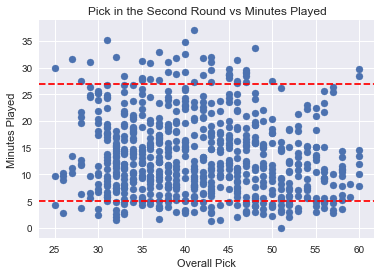

In [108]:
%matplotlib inline
plt.scatter(draft['Pk'], draft['MP'])
plt.axhline(y=27, color = 'red', ls = 'dashed')
plt.axhline(y=5, color = 'red', ls = 'dashed')
plt.title('Pick in the Second Round vs Minutes Played')
plt.xlabel('Overall Pick')
plt.ylabel('Minutes Played')
plt.show()

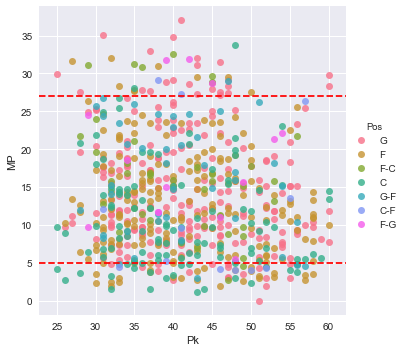

In [111]:
# Recreating the above plot using seaborn
sns.lmplot(x = 'Pk', y = 'MP', data = draft, hue = 'Pos', fit_reg = False)
plt.axhline(y=27, color = 'red', ls = 'dashed')
plt.axhline(y=5, color = 'red', ls = 'dashed')